In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*** step2. Data Preparation ***

\ Data Preparation section \

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read the csv file
def read_file(data_dir):
    data = pd.read_csv(data_dir)
    return data

# Specify the data directory and read the file
data_dir = '/Users/aping/PycharmProjects/DM2024-Lab1/Lab1 Handout/DM2024-Lab1-Homework/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
data = read_file(data_dir)

\ Filter Data by Sentiment \ 

In [47]:
# 讀取我的資料跟欄位，設定datapath & radomstate
def fetch_custom_data(data, categories):
    filtered_data = data[data['sentiment'].isin(categories)]
    train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42)
    return train_data, test_data

categories = ['not nostalgia', 'nostalgia']
train_data, test_data = fetch_custom_data(data, categories)

In [48]:
# just for test
print(train_data.head(), '\n', test_data.head())

          sentiment  \
382       nostalgia   
538   not nostalgia   
1493  not nostalgia   
1112      nostalgia   
324   not nostalgia   

                                                                                                                                                                                                                  comment  
382                                                                                                                          Tranent British Legion, 1970's. Loved the club and people. This song reminds me o happy days  
538                                                                                                                              The most underrated singer ever,a beautiful song ,r I p billy, what a fabulous voice !!!  
1493  He really has that "love you like a brother" look about him. That safe, let me tell about all my boyfriends, I'm gonna use you as a doormat sort of look. Good song though. It was one of my favori

In [49]:
# train_data.sentiment[0:2]

In [50]:
# train_data.comment[0:2]

*** step3. Data Transformation ***

\ Formatting Data Columns \ 

In [51]:
import helpers.data_mining_helpers as dmh

# Apply formatting function to sentiment and comment columns
x1 = pd.DataFrame.from_records(dmh.format_rows_revise(train_data, 'sentiment'), columns=['sentiment'])
x2 = pd.DataFrame.from_records(dmh.format_rows_revise(train_data, 'comment'), columns=['comment'])

# Concatenate formatted data
X = pd.concat([x1, x2], axis=1)

In [52]:
# just for test
# len(X)
# print(X)

*** step4. Data Mining using Pandas ***

\ Handling Missing Values \ 

In [53]:
import numpy as np

# Tabular presentation
''' X.isnull() '''
# Total Number of Presentation
X.isnull().apply(lambda x: dmh.check_missing_values(x.isin([np.nan])))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


note: add some dummy data to test

In [54]:
dummy_series = pd.Series(["dummy_record"], index=['sentiment'])
dummy_series.to_frame().T

,sentiment
0,dummy_record


In [55]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1201

In [56]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [57]:
X.dropna(inplace=True)
len(X)

1200

*** step.5 Data Preprocessing ***

In [58]:
# Sample 500 data points from X for analysis
X_sample = X.sample(n=500)
X_sample

,sentiment,comment
169,not nostalgia,Where can I find these kind of innocent love song with video
327,nostalgia,Yesterday's HAPPY TIMES & BEST MEMORIES really make me cry. They will never come back. Where are you now...long lost friend? Miss you? Show up even just once after those yesterday's best memories.
363,nostalgia,Great singer.. God bless those marvelous days when I was a child and life was better...and those memories now make me happy... Thanks Brenda Lee... May God Bless You...
68,nostalgia,when ever we had a house party and my dad had few drinks this was song he would sing i was only 9 at the time that was 40years ago boy it brings back memories long live jim reeves
1031,nostalgia,Brings back so much memories of the 80's and 90's when I was in my teenager years. So glad I got to experience that era. Sad now that I'm in my mid 40's.
...,...,...
1146,nostalgia,Takes me back a few years.
816,nostalgia,I well remember when this record shot up the country charts and crossed over to the pop charts. A unforgettable able song sung to perfection by a pure country artist who also happened technically to be impeccable. How can anyone not love this music which never grows old?
126,not nostalgia,I'll leave this comment here .. see you in the future with tears in my eyes.
34,nostalgia,THANK YOU for posting this superb share....memories are made of this gem.


\ Data Visualization \ 

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# just for test 
# categories

sentiment
not nostalgia    602
nostalgia        598
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

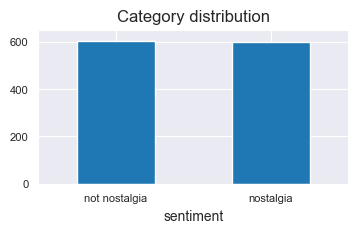

In [61]:
# Plot bar chart for category distribution
print(X.sentiment.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                title = 'Category distribution',
                                ylim = [0, 650],        
                                rot = 0, fontsize = 8, figsize = (4,2))

\ Feature Creation: Text Tokenization \ 

In [62]:
import nltk

In [63]:
# Create unigrams from comments
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0                                                                                                                                                                   [Tranent, British, Legion, ,, 1970, 's, ., Loved, the, club, and, people, ., This, song, reminds, me, o, happy, days]
1                                                                                                                                                                   [The, most, underrated, singer, ever, ,, a, beautiful, song, ,, r, I, p, billy, ,, what, a, fabulous, voice, !, !, !]
2    [He, really, has, that, ``, love, you, like, a, brother, '', look, about, him, ., That, safe, ,, let, me, tell, about, all, my, boyfriends, ,, I, 'm, gon, na, use, you, as, a, doormat, sort, of, look, ., Good, song, though, ., It, was, one, of, my, favorites, around, 1980, .]
3                                                                                                                                             [Thank, you,

In [64]:
# X[0:4]

\ Feature subset selection: Convert Text Data to Word Counts \

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
#learn the vocabulary and return document-term matrix
X_counts = count_vect.fit_transform(X.comment) 

# just for test
# print(X_counts[0])

In [66]:
# test
count_vect.get_feature_names_out()[1000]

'environmental'

In [67]:
# test 
analyze = count_vect.build_analyzer()
# test analyze
analyze(X.comment[1])

['the',
 'most',
 'underrated',
 'singer',
 'ever',
 'beautiful',
 'song',
 'billy',
 'what',
 'fabulous',
 'voice']

In [68]:
X_counts.shape

(1200, 3284)

In [69]:
count_vect.get_feature_names_out()[0:10]

array(['000', '045', '07', '10', '100', '10m', '11', '11th', '12', '13'],
      dtype=object)

In [70]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [71]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

\ Visualization: Heatmap of Term-Document Frequencies \

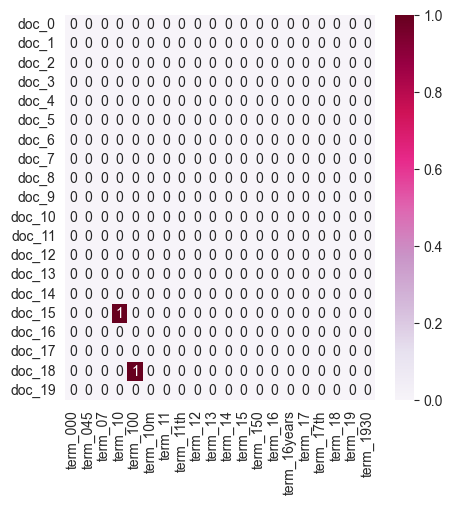

In [72]:
# Create a heatmap to visualize the frequency of selected terms across selected documents
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(5, 5))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

\ Attribute Transformation: Aggregation of Term Frequencies \

In [73]:
# Aggregate term frequencies by summing across all documents
term_frequencies = []

for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

2

/var/folders/6s/ml8d1fzs5wv4kr9zt85ggq0m0000gn/T/ipykernel_86684/3397000641.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



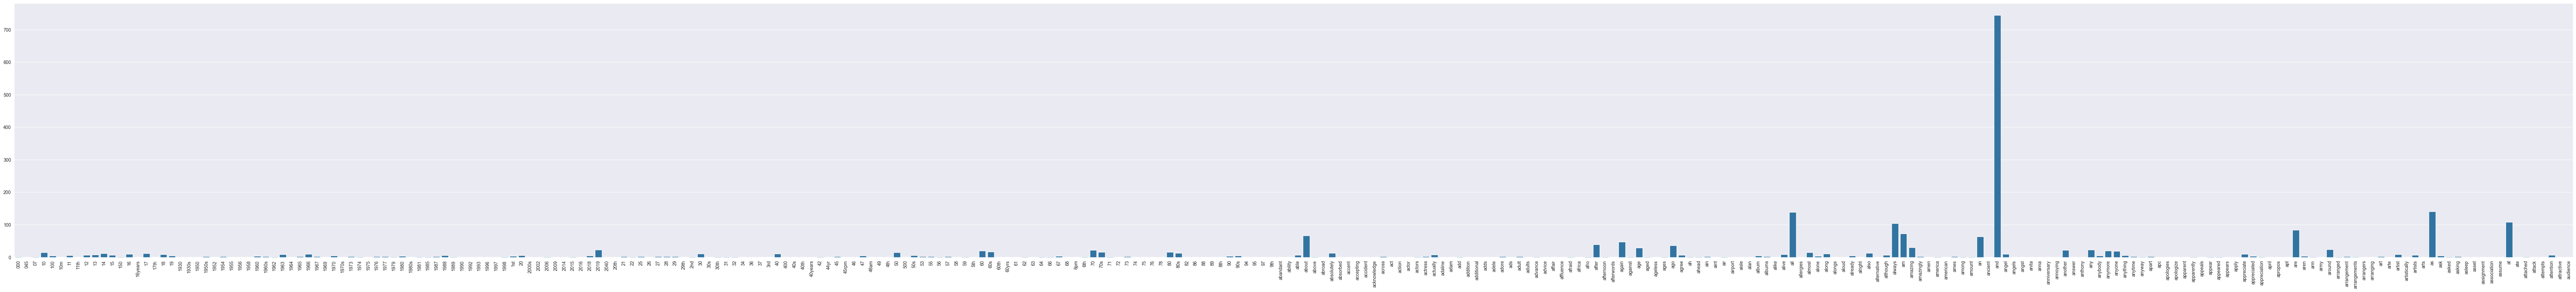

In [74]:
# Plot the frequency distribution of the first 300 terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

\ Interactive Bar Graph \

In [75]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"
fig = go.Figure(
    data=[
        go.Bar(
            x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300]
        )
    ]
)

fig.update_layout(
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,
    height=800,
    width=1500)

fig.show()

\ top Term Frequencies \

In [76]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"
N = 50  # Set N to a smaller number for efficiency
indices = np.argsort(term_frequencies)[-N:][::-1]

# Create a bar chart with Plotly
fig = go.Figure(
    data=[
        go.Bar(
            x=[count_vect.get_feature_names_out()[i] for i in indices],
            y=[term_frequencies[i] for i in indices],
            marker=dict(
                color='rgba(255, 255, 102, 0.6)',  # Fill color
                line=dict(color='rgba(0, 0, 0, 1.0)', width=2)  # Outline color and width
            )
        )
    ]
)


fig.update_layout(
    title="top Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,
    height=800,
    width=1500)

fig.show()

transform the values in that vector into the log distribution

/var/folders/6s/ml8d1fzs5wv4kr9zt85ggq0m0000gn/T/ipykernel_86684/1190816637.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



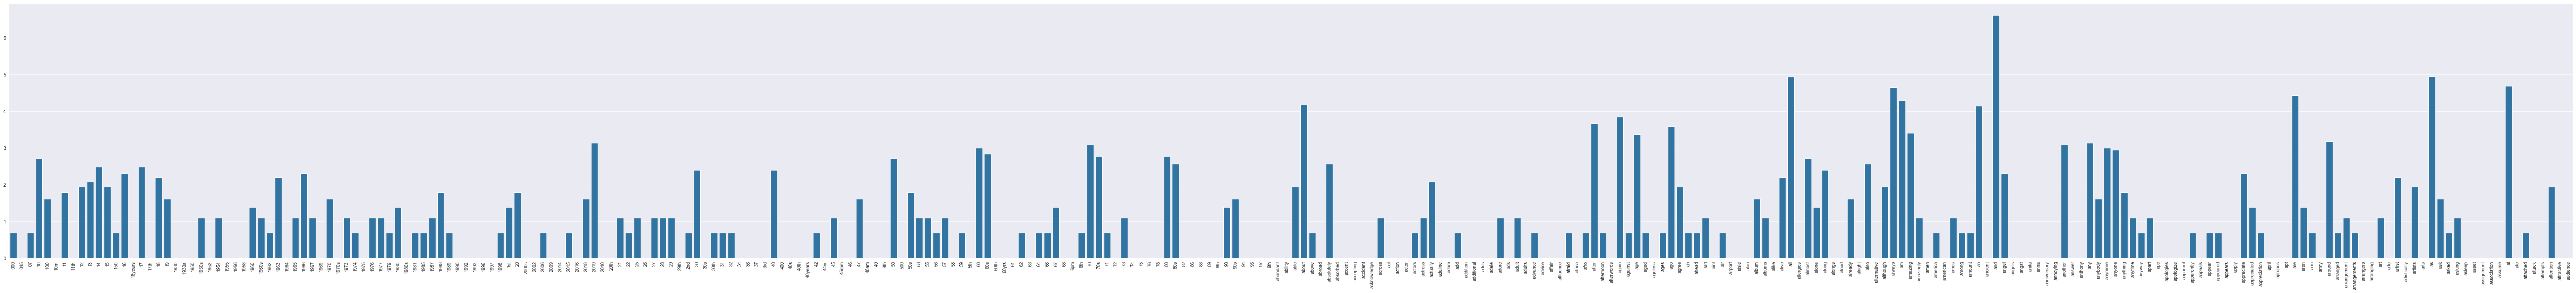

In [77]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

\ Feature Subset Selection: Create Separate DataFrames for Each Sentiment Category \

In [78]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
sentiment = X['sentiment'].unique()  # Get unique category labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each category

for s_kind in sentiment:
    # Filter the original DataFrame by category
    sentiment_dfs[s_kind] = X[X['sentiment'] == s_kind].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for s_kind in sentiment:
    filt_term_document_dfs[s_kind] = create_term_document_df(sentiment_dfs[s_kind])

In [79]:
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[category_number]}:")
filt_term_document_dfs[sentiment[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


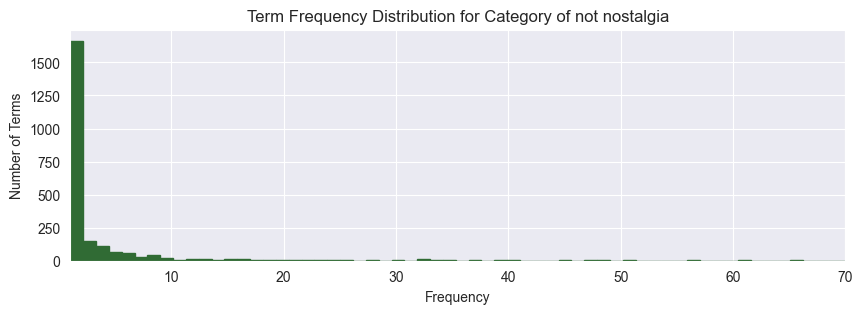

In [80]:
 # Sum over all documents to get total frequency for each word
category_number=1#You can change it 0 or 1
word_counts = filt_term_document_dfs[sentiment[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 3))
plt.hist(word_counts, bins=500, color='#306b34', edgecolor='#306b34')
plt.title(f'Term Frequency Distribution for Category of {sentiment[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 70)
plt.show()

In [81]:
category_number=0 #not nostalgia or nostalgia
word_counts = filt_term_document_dfs[sentiment[category_number]].sum(axis=0).to_numpy()

# top5%
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# least1%
sorted_indices_b = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts_b = word_counts[sorted_indices] 

# top5%
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
# least1%
total_terms = len(sorted_counts_b)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
bottom_1_percent_indices = sorted_indices_b[:bottom_1_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiment[category_number]].iloc[:, i].name for i in top_5_percent_indices]
filtered_words_b = [filt_term_document_dfs[sentiment[category_number]].iloc[:, b].name for b in bottom_1_percent_indices]

print(f"Category: {sentiment[category_number]}")

print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words_b}")

Category: nostalgia
Number of terms in top 5%: 99
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'on', 'that', 'love', 'for', 'you', 'remember', 'time', 'with', 'old', 'is', 'music', 'brings', 'great', 'we', 'as', 'now', 'beautiful', 'but', 'miss', 'from', 'good', 'he', 'her', 'all', 'at', 'still', 'days', 'reminds', 'dad', 'just', 'always', 'songs', 'childhood', 'his', 'first', 'many', 'she', 'have', 'had', 'like', 'listening', 'much', 'up', 'loved', 'voice', 'be', 'one', 'not', 'times', 'am', 'listen', 'him', 'can', 'hear', 'school', 'used', 'every', 'very', 'were', 'young', 'those', 'what', 'out', 'then', 'sing', 'heard', 'thank', 'played', 'again', 'never', 'are', 'these', 'how', 'best', 'thanks', 'they', 'an', 'radio', 'ago', 'day', 'happy', 'really', 'passed']
Number of terms in bottom 1%: 19
Filtered terms: ['yup', 'rolled', 'grand', 'grammartical', 'gramaphone', 'rolling', 'graffiti', 'grandch

In [82]:
# sorted_counts

In [83]:
category_number=0 

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for s_kind in sentiment:
    print(f'\nFor sentiment {s_kind} we filter the following words:')
    term_document_dfs[s_kind] = filter_top_bottom_words_by_sum (filt_term_document_dfs[s_kind])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiment[category_number]}:")
term_document_dfs[sentiment[category_number]]


For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup              1
rolled           1
grand            1
grammartical     1
gramaphone       1
rolling          1
graffiti         1
grandchildren    1
graduation       1
gradually        1
romanticism      1
grace            1
grabbed          1
ronnie           1
gospel           1
romance          1
rose             1
roll             1
robbie           1
dtype: int64
Top 5.0% words: 
passed     28
really     28
happy      28
day        28
ago        30
         ... 
and       383
to        429
this      445
my        448
the       519
Length: 99, dtype: int64

For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
leader           1
muchm            1
ms               1
mph              1
moving           1
motor            1
mornings         1
morning          1
moral            1
moodier          1
mood             1
monumental       1
montgomery       1
money            1
monday  

,07,10,11,11th,12,13,14,15,16,17,...,yo,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# 分析 nostalgia＆not 以及相對照詞語出現的頻率
import os
from PAMI.extras.convert import denseDF2DB as db
from PAMI.extras.dbStats import TransactionalDatabase as tds

nostalgia_df = X[X['sentiment'] == 'nostalgia'].copy()  # nostalgia 類別
not_nostalgia_df = X[X['sentiment'] == 'not nostalgia'].copy() # not nostalgia

# 創建兩個類別的文件-詞頻 DataFrame
nostalgia_term_document_df = create_term_document_df(nostalgia_df)
not_nostalgia_term_document_df = create_term_document_df(not_nostalgia_df)

# Loop through the dictionary of term-document DataFrames
for category, term_document_df in [('nostalgia', nostalgia_term_document_df), ('not_nostalgia', not_nostalgia_term_document_df)]:
    obj = db.denseDF2DB(term_document_df)
    save_0 = '/Users/aping/PycharmProjects/DM2024-Lab1/Lab1 Handout/DM2024-Lab1-Homework/nostalgia_csv'
    output = os.path.join(save_0, f'td_freq_db_{category}.csv')
    obj.convert2TransactionalDatabase(output, '>=', 1)

Database size (total no of transactions) : 602
Number of items : 2328
Minimum Transaction Size : 4
Average Transaction Size : 20.14784053156146
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.566970589043924
Variance in Transaction Sizes : 111.84665922244764
Sparsity : 0.9913454293249306


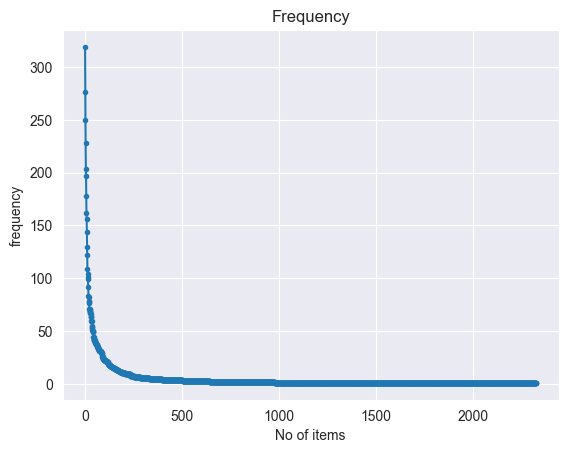

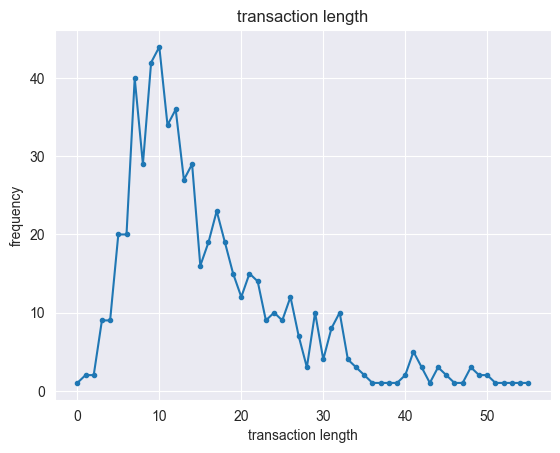

In [85]:
for category in ['nostalgia']:
    tds_obj = tds.TransactionalDatabase(output)
    tds_obj.run()  
    tds_obj.printStats()  
    tds_obj.plotGraphs()  

\ Frequent Pattern Mining: FPGrowth Algorithm \

In [86]:
# FPGrowth_nostalgia
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
nos = alg.FPGrowth(iFile=output, minSup=minSup)
nos.mine()
FPGrowth_nostalgia= nos.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(FPGrowth_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(nos.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 188804
Runtime: 1.021806001663208


In [87]:
save_1 = '/Users/aping/PycharmProjects/DM2024-Lab1/Lab1 Handout/DM2024-Lab1-Homework/nostalgia_csv'
os.path.join(save_1, 'freq_patterns_nostalgia.txt')
FPGrowth_nostalgia 

,Patterns,Support
0,underrated,3
1,1980,3
2,brother,3
3,brother he,3
4,sort,3
...,...,...
188799,and this the,64
188800,and the,137
188801,this,276
188802,this the,140


In [88]:
# FPGrowth_not nostalgia
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=3
not_nos = alg.FPGrowth(iFile=output, minSup=minSup)
not_nos.mine()
FPGrowth_not_nostalgia= nos.getPatternsAsDataFrame()

# Print the number of patterns found
print('Total No of patterns: ' + str(len(FPGrowth_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(not_nos.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 188804
Runtime: 2.0504298210144043


In [89]:
os.path.join(save_1, 'freq_patterns_not_nostalgia.txt')
FPGrowth_not_nostalgia

,Patterns,Support
0,underrated,3
1,1980,3
2,brother,3
3,brother he,3
4,sort,3
...,...,...
188799,and this the,64
188800,and the,137
188801,this,276
188802,this the,140


In [90]:
# test
# print(FPGrowth_not_nostalgia.columns)
# print(FPGrowth_nostalgia.columns)

\ Frequent Pattern Mining: FAE \

In [91]:
# fae nostalgia
from PAMI.frequentPattern.topk import FAE

k = 4  # Example value, adjust it as needed
fae_nostalgia = FAE.FAE(iFile=output, k=k)
fae_nostalgia.mine()
frequent_fae_comp_graphics = fae_nostalgia.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequent_fae_comp_graphics)))  # Print the total number of patterns
print('Runtime: ' + str(fae_nostalgia.getRuntime()))  # Print runtime

save_2 = os.path.join(save_1, 'freq_patterns_nostalgia_fae.txt')
fae_nostalgia.save(save_2)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 4
Runtime: 0.009317874908447266


In [92]:
# fae not nostalgia
from PAMI.frequentPattern.topk import FAE

k = 4  # Example value, adjust it as needed
fae_not_nostalgia = FAE.FAE(iFile=output, k=k)
fae_nostalgia.mine()
frequent_fae_comp_graphics_not = fae_not_nostalgia.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequent_fae_comp_graphics)))  # Print the total number of patterns
print('Runtime: ' + str(fae_nostalgia.getRuntime()))  # Print runtime

save_2_not = os.path.join(save_1, 'freq_patterns_nostalgia_fae.txt')
fae_nostalgia.save(save_2_not)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 4
Runtime: 0.008939027786254883


\ Frequent Pattern Mining: MaxFPGrowth \

In [93]:
# MaxFPGrowth nostalgia
from PAMI.frequentPattern.maximal import MaxFPGrowth

minSup = 4
max_nostalgia = MaxFPGrowth.MaxFPGrowth(iFile=output, minSup=minSup )
max_nostalgia.mine()
frequent_max_comp_graphics = max_nostalgia.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequent_max_comp_graphics)))  # Print the total number of patterns
print('Runtime: ' + str(max_nostalgia.getRuntime()))  # Print runtime

save_3 = os.path.join(save_1, 'freq_patterns_nostalgia_maxfp.txt')
max_nostalgia.save(save_3)  # Save the patterns

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 13208
Runtime: 3.093757152557373


In [94]:
# MaxFPGrowth not nostalgia
from PAMI.frequentPattern.maximal import MaxFPGrowth

minSup = 4
max_not_nostalgia = MaxFPGrowth.MaxFPGrowth(iFile=output, minSup=minSup )
max_not_nostalgia.mine()
frequent_max_comp_graphics_not = max_not_nostalgia.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequent_max_comp_graphics_not)))  # Print the total number of patterns
print('Runtime: ' + str(max_not_nostalgia.getRuntime()))  # Print runtime

save_4 = os.path.join(save_1, 'freq_patterns_nostalgia_maxfp_not.txt')
max_nostalgia.save(save_4)  # Save the patterns

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 13208
Runtime: 2.8695921897888184


In [95]:
# test
# print(X.columns#

In [96]:
import pandas as pd

dfs = [FPGrowth_not_nostalgia, FPGrowth_nostalgia]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1  # 如果模式還不存在於字典中，則將其計數設為1
        else:
            pattern_counts[pattern] += 1  # 如果模式已經存在於字典中，則將其計數加1
            
# 上面顯示3
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count <= 3}

total_patterns_count = sum(len(df) for df in dfs)

discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)  # 將過濾後的資料框添加到列表中

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)

print(f"Number of patterns discarded: {discarded_patterns_count}")

                       Patterns  Support
377607                      the      319
188803                      the      319
377605                     this      276
188801                     this      276
188797                      and      250
...                         ...      ...
143079  beautiful in so song to        3
143078     beautiful in so song        3
143077  beautiful in so this to        3
143076     beautiful in so this        3
188804               underrated        3

[377608 rows x 2 columns]
Number of patterns discarded: 188804


In [97]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Convert term-document matrix to a DataFrame for easier manipulation
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# print("finish1")

In [98]:
# Iterate over each pattern to check if all words are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = pattern.split()
    # Check if each word in the pattern exists in the vocabulary
    matching_columns = [word for word in pattern_words if word in terms]
    if matching_columns:
        # If all words in the pattern exist in the vocabulary, update the pattern_matrix
        pattern_matrix[pattern] = tdm_df[matching_columns].all(axis=1).astype(int)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

# Final output
print(augmented_df)

KeyboardInterrupt: 

\ Dimensionality Reduction: PCA, t-SNE, and UMAP \

In [ ]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to term-document matrix
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [ ]:
# test 
'''print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)'''

In [ ]:
# Plotting Dimensionality Reduction Results
col = ['red', 'blue']
sentiment = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10)) 
# Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [ ]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['red', 'blue']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

\ Discretization and Binarization \

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

In [ ]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:3]

*** step6. Data Exploration ***

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1, document_to_transform_2, document_to_transform_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" % {"x": cos_sim_count_1_2.item()})
print("Cosine Similarity using count bw 1 and 3: %(x)f" % {"x": cos_sim_count_1_3.item()})
print("Cosine Similarity using count bw 2 and 3: %(x)f" % {"x": cos_sim_count_2_3.item()})

print("Cosine Similarity using count bw 1 and 1: %(x)f" % {"x": cos_sim_count_1_1.item()})
print("Cosine Similarity using count bw 2 and 2: %(x)f" % {"x": cos_sim_count_2_2.item()})
print("Cosine Similarity using count bw 3 and 3: %(x)f" % {"x": cos_sim_count_3_3.item()})


*** step7. Data Classification ***

\ Data Classification: Naive Bayes Classification \

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'comment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=target_names, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Print evaluation results
print("\n================ Evaluation Results ================")
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n")
print(report_df)
print("\n====================================================\n")